This script generates the scatter-plots for the figures 4, 5, 8, 10, 11, 12, and 13 using a `.sav` file created by `idl` 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
#print(os.getcwd())
from scipy.io import readsav
import numpy as np
import pandas as pd
from scipy.stats import linregress
from matplotlib.ticker import (MultipleLocator,  AutoMinorLocator, ScalarFormatter)
from my_functions import marker_color
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.rc('axes', linewidth=2)
plt.rcParams['font.size'] = '20'
from sklearn.metrics import r2_score


<span style="font-size:40px;">Figure 5</span> (currently: Fig5)

In [3]:
data = readsav('../data/Fig5.sav')

# Explore the loaded data
print(data.keys())  # View the 

df = pd.DataFrame(data=data['s'],columns = ['Test_name'])
df['Fr'] = data['x']; df['pph'] = data['y']

df, tnames, tstrength, legend_elements = marker_color(df)
df

dict_keys(['figname', 'xtit', 'ytit', 'x', 'y', 's'])


,Test_name,Fr,pph,color,marker
0,B1high,15.923567,-999.999023,tab:purple,o
1,B2mid,8.064517,105.000000,tab:red,s
2,B3low,3.980892,80.000000,tab:green,X
3,B4vlow,1.984127,50.000000,tab:orange,^
4,B5vvlow,0.976562,25.000000,tab:blue,D
5,B2high,15.923567,-999.999023,tab:purple,s
6,B3mid,7.961783,85.000000,tab:red,X
7,B4low,3.968254,50.000000,tab:green,^
8,B5vlow,1.953125,30.000000,tab:orange,D
9,B3high,15.923567,95.000000,tab:purple,X


Passive propagation height (pph) versus Froude number (fr)

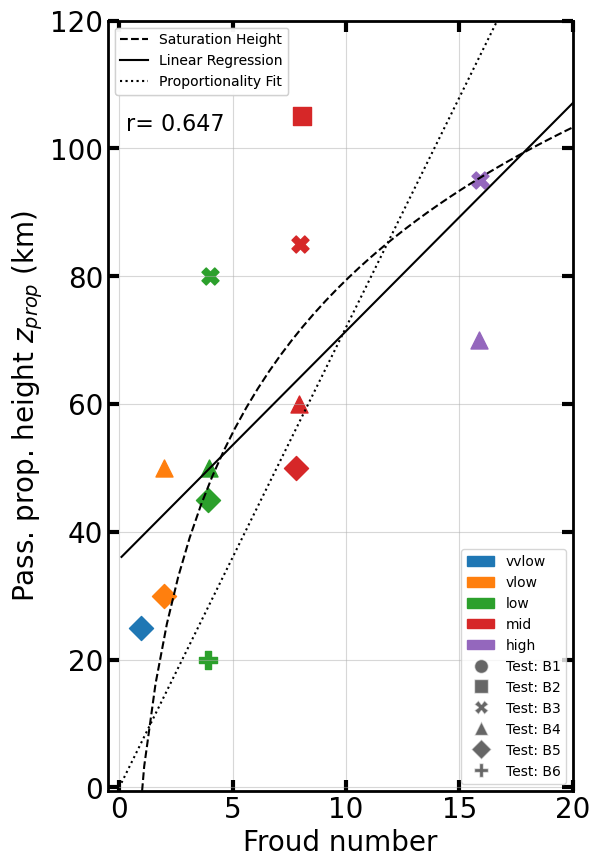

In [4]:
mask = (df['pph'] > 0)
x_clean = df['Fr'][mask]
y_clean = df['pph'][mask]

fig, ax = plt.subplots(figsize=(6, 10))
ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'Fr'], df.at[i, 'pph'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
ax.set_xlim([-0.5, 20])
ax.set_ylim([-0.5, 120])

# Add grid and labels
plt.grid(True, alpha=0.5)
ax.set_xlabel("Froud number")
ax.set_ylabel("Pass. prop. height $z_{prop}$ (km)")

# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="lower right", fontsize=10)
ax.add_artist(scatter_legend)  # Add the scatter legend manually

# Calculate and plot saturation height
gamma_u = 0.029
fr = np.arange(0.1, 25, 0.5)
z_sat = np.log(fr) / gamma_u
p1 = ax.plot(fr, z_sat, '--k', label='Saturation Height')

# Perform Linear Regression (y = mx + c)
slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
y_linreg = slope * fr + intercept
p2 = ax.plot(fr, y_linreg, '-k', label='Linear Regression')

# Perform Proportionality Fit (y = mx)
slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
y_proportional = slope_proportional * fr
p3 = ax.plot(fr, y_proportional, ':k', label='Proportionality Fit')

# Add additional legend for p1, p2, p3
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='--', color='k', label='Saturation Height'),
    plt.Line2D([0], [0], linestyle='-', color='k', label='Linear Regression'),
    plt.Line2D([0], [0], linestyle=':', color='k', label='Proportionality Fit')
], loc="upper left", fontsize=10)

# Add both legends to the plot
ax.add_artist(additional_legend)  # Add the line legend manually

ax.text(0.04, 0.88, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')

#plt.savefig('../article_figs/Fig5.png',bbox_inches='tight')
#plt.savefig('../article_figs/Fig5.pdf',bbox_inches='tight')
plt.show()



<span style="font-size:40px;">Figure 4</span> (Currently: Fig4)

In [5]:
dataf = readsav('../data/Fig4-fr.sav')
datau = readsav('../data/Fig4-u0.sav')

# Explore the loaded data
print(datau.keys())  # View the 

df = pd.DataFrame(data=dataf['s'],columns = ['Test_name'])
df ['u']= datau['x']; df['pwd'] = datau['y']; 
df['Fr*alpha'] = dataf['x']; df['dim.pwd'] = dataf['y']; 
df, tnames, tstrength, legend_elements = marker_color(df)
df

dict_keys(['figname', 'xtit', 'ytit', 'x', 'y', 's'])


,Test_name,u,pwd,Fr*alpha,dim.pwd,color,marker
0,B1high,5.0,-999.999023,0.161290,-999.999023,tab:purple,o
1,B2mid,5.0,-1.900000,0.080645,-0.007037,tab:red,s
2,B3low,5.0,-1.600000,0.040650,-0.005926,tab:green,X
3,B4vlow,5.0,-1.700000,0.020000,-0.006296,tab:orange,^
4,B5vvlow,5.0,-0.750000,0.010142,-0.002778,tab:blue,D
5,B2high,10.0,-999.999023,0.161290,-999.999023,tab:purple,s
6,B3mid,10.0,-12.000000,0.081301,-0.011111,tab:red,X
7,B4low,10.0,-7.000000,0.040000,-0.006481,tab:green,^
8,B5vlow,10.0,-3.000000,0.020284,-0.002778,tab:orange,D
9,B3high,20.0,-23.000000,0.162602,-0.005324,tab:purple,X


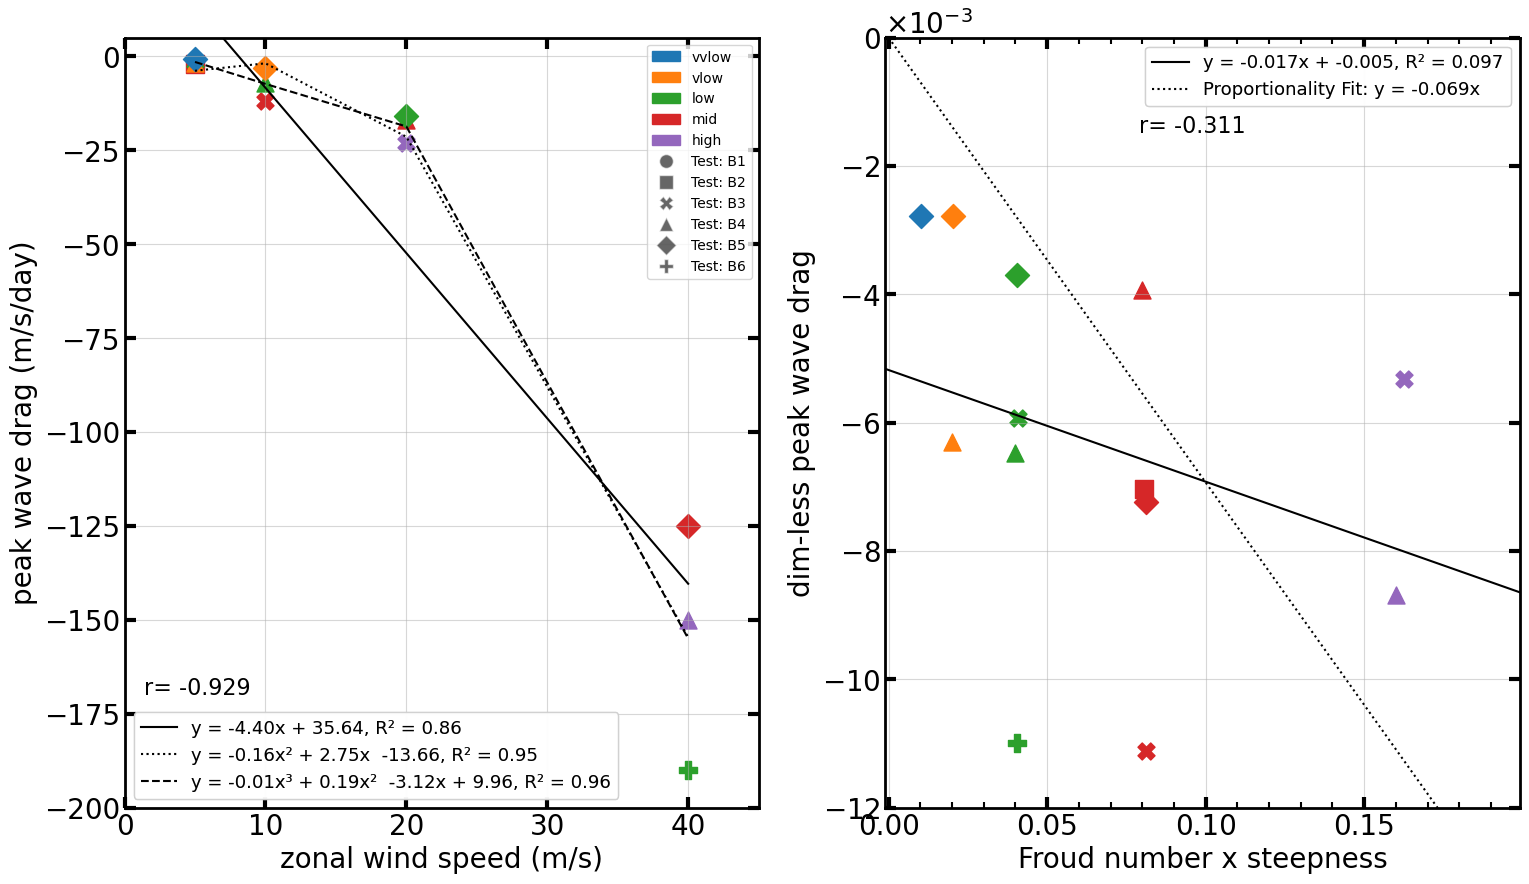

In [6]:

mask = (df['pwd'] > -200)
x_clean = df['u'][mask]
y_clean = df['pwd'][mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
for ax in axes:
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
####################################################### left panel
ax = axes[0]
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'u'], df.at[i, 'pwd'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
x= np.arange(-0.001,45,1)
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-200, 5])

# Add grid and labels
ax.set_xlabel("zonal wind speed (m/s)")
ax.set_ylabel("peak wave drag (m/s/day)")

# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="upper right", fontsize=10)
ax.add_artist(scatter_legend)  # Add the scatter legend manually

# Try fitting a polynomial relationship
x = x_clean
y = y_clean

# Linear fit
coeffs_linear = np.polyfit(x, y, 1)  # Degree 1 polynomial
y_linear = np.polyval(coeffs_linear, x)
r2_linear = r2_score(y, y_linear)
ax.plot(x, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

# Quadratic fit
coeffs_quadratic = np.polyfit(x, y, 2)  # Degree 2 polynomial
y_quadratic = np.polyval(coeffs_quadratic, x)
r2_quadratic = r2_score(y, y_quadratic)
ax.plot(x, y_quadratic, ':k', label=f"Quadratic Fit (R²={r2_quadratic:.2f})")

# Cubic fit
coeffs_cubic = np.polyfit(x, y, 3)  # Degree 3 polynomial
y_cubic = np.polyval(coeffs_cubic, x)
r2_cubic = r2_score(y, y_cubic)
ax.plot(x, y_cubic, '--k', label=f"Cubic Fit (R²={r2_cubic:.2f})")

# Add legend and show plot
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-',  color='k', label="y = {:.2f}x + {:.2f}, R² = {:.2f}".format(*coeffs_linear, r2_linear)),
    plt.Line2D([0], [0], linestyle=':',  color='k', label="y = {:.2f}x² + {:.2f}x  {:.2f}, R² = {:.2f}".format(*coeffs_quadratic, r2_quadratic)),
    plt.Line2D([0], [0], linestyle='--', color='k', label="y = {:.2f}x³ + {:.2f}x²  {:.2f}x + {:.2f}, R² = {:.2f}".format(*coeffs_cubic, r2_cubic))
], loc="lower left", fontsize=13)

ax.add_artist(additional_legend)  # Add the line legend manually
ax.text(0.03, 0.17, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')

####################################################### right panel
x_clean = df['Fr*alpha'][mask]
y_clean = df['dim.pwd'][mask]

ax = axes[1]
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'Fr*alpha'], df.at[i, 'dim.pwd'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
x= np.arange(-0.001,0.23,0.05)
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-0.012, 0])

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(-3, -3))
ax.xaxis.set_major_locator(MultipleLocator(0.05)) 
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

# Add grid and labels
ax.set_xlabel("Froud number x steepness")
ax.set_ylabel("dim-less peak wave drag")

# Perform Linear Regression (y = mx + c)
slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
r2_linear = r2_score(y_clean, slope*x_clean+intercept)
y_linreg = slope * x + intercept
p2 = ax.plot(x, y_linreg, '-k', label='Linear Regression')

# Perform Proportionality Fit (y = mx)
slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
y_proportional = slope_proportional * x
p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')

# Add additional legend for  p2, p3
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.3f}x + {:.3f}, R² = {:.3f}".format(slope, intercept, r2_linear)),
    plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit: y = {:.3f}x".format(slope_proportional))
], loc="upper right", fontsize=13)

# Add both legends to the plot
ax.add_artist(additional_legend)  # Add the line legend manually

ax.text(0.4, 0.90, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')
##################################################################### saving the plot
# plt.savefig('../article_figs/Fig4.png',bbox_inches='tight')
# plt.savefig('../article_figs/Fig4.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 8</span> (currently: Fig8)

In [7]:
data = readsav('../data/Fig8.sav')

# Explore the loaded data
print(data.keys())  # View the key params

# diagnosed PGW zonal wavenumber with the expected MW zonal wavenumber
df = pd.DataFrame(data=data['s'],columns = ['Test_name'])
df ['theory']= data['x']; df['observation'] = data['y']; 

df, tnames, tstrength, legend_elements = marker_color(df)
df


dict_keys(['figname', 'xtit', 'ytit', 'x', 'y', 's'])


,Test_name,theory,observation,color,marker
0,B1high,0.625000,0.83860,tab:purple,o
1,B2mid,0.322581,0.43740,tab:red,s
2,B3low,0.158730,0.22130,tab:green,X
3,B4vlow,0.079365,0.11280,tab:orange,^
4,B5vvlow,0.039062,0.06557,tab:blue,D
5,B2high,0.322581,0.44260,tab:purple,s
6,B3mid,0.158730,0.23210,tab:red,X
7,B4low,0.079365,0.11820,tab:green,^
8,B5vlow,0.039062,0.05959,tab:orange,D
9,B3high,0.158730,0.24150,tab:purple,X


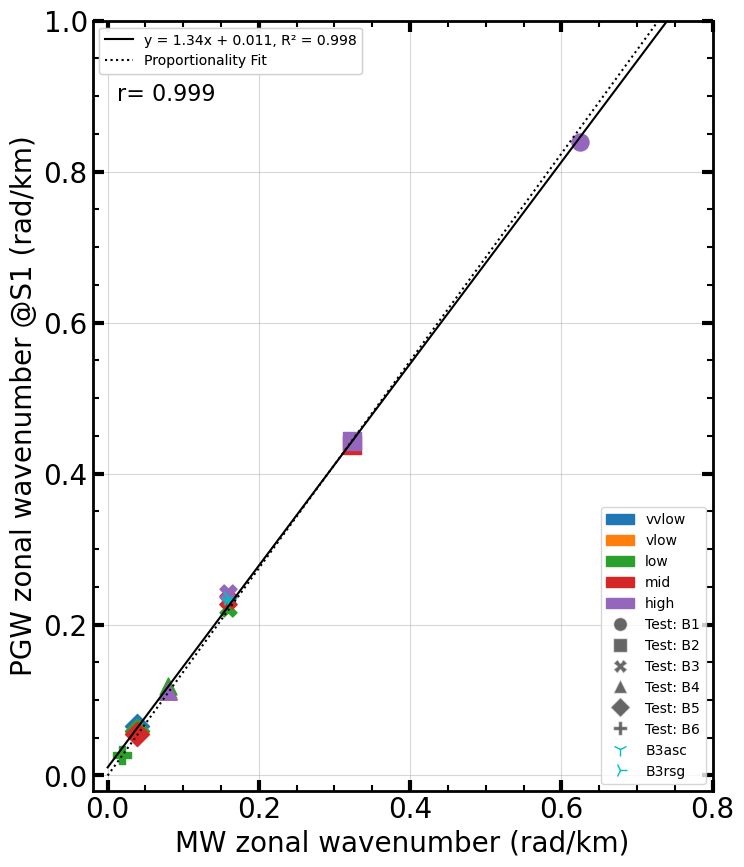

In [8]:
x_clean = df['theory']
y_clean = df['observation']

fig, ax = plt.subplots(figsize=(8, 10))

ax.grid(True, alpha=0.5)
ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'theory'], df.at[i, 'observation'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
ax.set_xlim([-0.02, 0.8])
ax.set_ylim([-0.02, 1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

# Add grid and labels
plt.grid(True, alpha=0.5)
ax.set_xlabel("MW zonal wavenumber (rad/km)")
ax.set_ylabel("PGW zonal wavenumber @S1 (rad/km)")

# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="lower right", fontsize=10)
ax.add_artist(scatter_legend)  # Add the scatter legend manually

# Perform Linear Regression (y = mx + c)
x = np.arange(0, 1, 0.05)
xx = x_clean
yy = y_clean
coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
y_linear = np.polyval(coeffs_linear, xx)
r2_linear = r2_score(yy, y_linear)
# ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
y_linreg = slope * x + intercept
p2 = ax.plot(x, y_linreg, '-k', label='Linear Regression')

# Perform Proportionality Fit (y = mx)
slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
y_proportional = slope_proportional * x
p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')

# Add additional legend for p1, p2, p3
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(slope, intercept, r2_linear)),
    plt.Line2D([0], [0], linestyle=':', color='k', label='Proportionality Fit')
], loc="upper left", fontsize=10)

# Add both legends to the plot
ax.add_artist(additional_legend)  # Add the line legend manually

ax.text(0.04, 0.92, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')

# plt.savefig('../article_figs/Fig8.png',bbox_inches='tight')
# plt.savefig('../article_figs/Fig8.pdf',bbox_inches='tight')
plt.show()



<br>
<br>
<span style="font-size:40px;">Figure 10</span> (currently: Fig10)

In [9]:
data = readsav('../data/Fig10.sav')

# Explore the loaded data
print(data.keys())  # View the key params

# diagnosed PGW vertical wavenumber with the expected MW vertical wavenumber
df = pd.DataFrame(data=data['s'],columns = ['Test_name'])
df ['theory']= data['x']; df['observation'] = data['y']; 

df, tnames, tstrength, legend_elements = marker_color(df)
df

dict_keys(['figname', 'xtit', 'ytit', 'x', 'y', 's'])


,Test_name,theory,observation,color,marker
0,B1high,4.0,3.2170,tab:purple,o
1,B2mid,4.0,3.2450,tab:red,s
2,B3low,4.0,3.2210,tab:green,X
3,B4vlow,4.0,3.2050,tab:orange,^
4,B5vvlow,4.0,3.3940,tab:blue,D
5,B2high,2.0,1.6770,tab:purple,s
6,B3mid,2.0,1.6980,tab:red,X
7,B4low,2.0,1.6920,tab:green,^
8,B5vlow,2.0,1.7000,tab:orange,D
9,B3high,1.0,0.8874,tab:purple,X


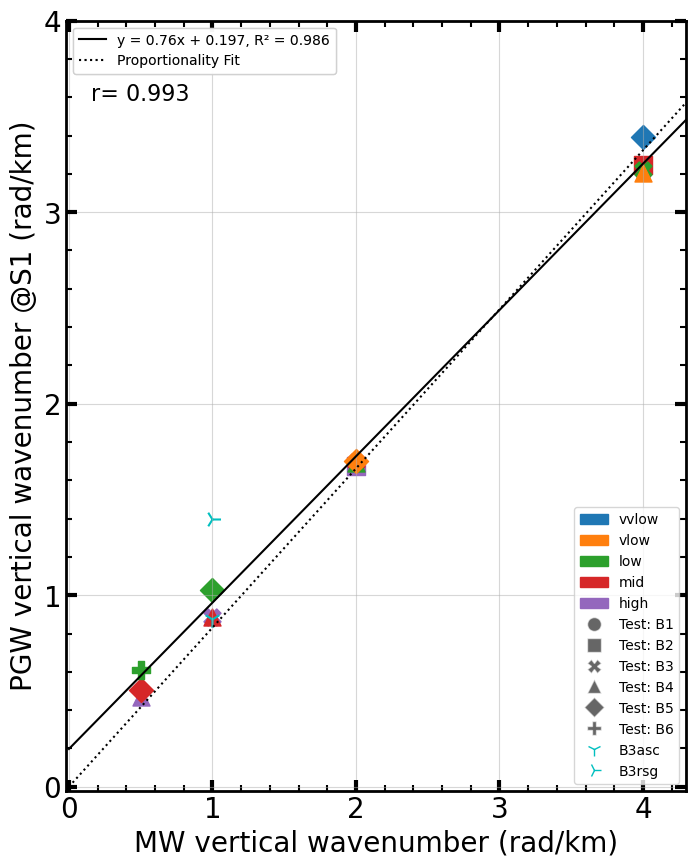

In [10]:
x_clean = df['theory']
y_clean = df['observation']

fig, ax = plt.subplots(figsize=(8, 10))

ax.grid(True, alpha=0.5)
ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'theory'], df.at[i, 'observation'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
x = np.arange(0, 5, 0.5)
ax.set_xlim([-0.02, 4.3])
ax.set_ylim([-0.02, 4])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))

# Add grid and labels
ax.set_xlabel("MW vertical wavenumber (rad/km)")
ax.set_ylabel("PGW vertical wavenumber @S1 (rad/km)")

# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="lower right", fontsize=10)
ax.add_artist(scatter_legend)  # Add the scatter legend manually

# Perform Linear Regression (y = mx + c)
xx = x_clean
yy = y_clean
coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
y_linear = np.polyval(coeffs_linear, xx)
r2_linear = r2_score(yy, y_linear)
# ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
y_linreg = slope * x + intercept
p2 = ax.plot(x, y_linreg, '-k', label='Linear Regression')

# Perform Proportionality Fit (y = mx)
slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
y_proportional = slope_proportional * x
p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')

# Add additional legend for p1, p2, p3
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(slope, intercept, r2_linear)),
    plt.Line2D([0], [0], linestyle=':', color='k', label='Proportionality Fit')
], loc="upper left", fontsize=10)

# Add both legends to the plot
ax.add_artist(additional_legend)  # Add the line legend manually

ax.text(0.04, 0.92, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')

# plt.savefig('../article_figs/Fig10.png',bbox_inches='tight')
# plt.savefig('../article_figs/Fig10.pdf',bbox_inches='tight')
plt.show()



<br>
<br><span style="font-size:40px;">Figure 12</span> (currently: Figs 12,13,14))

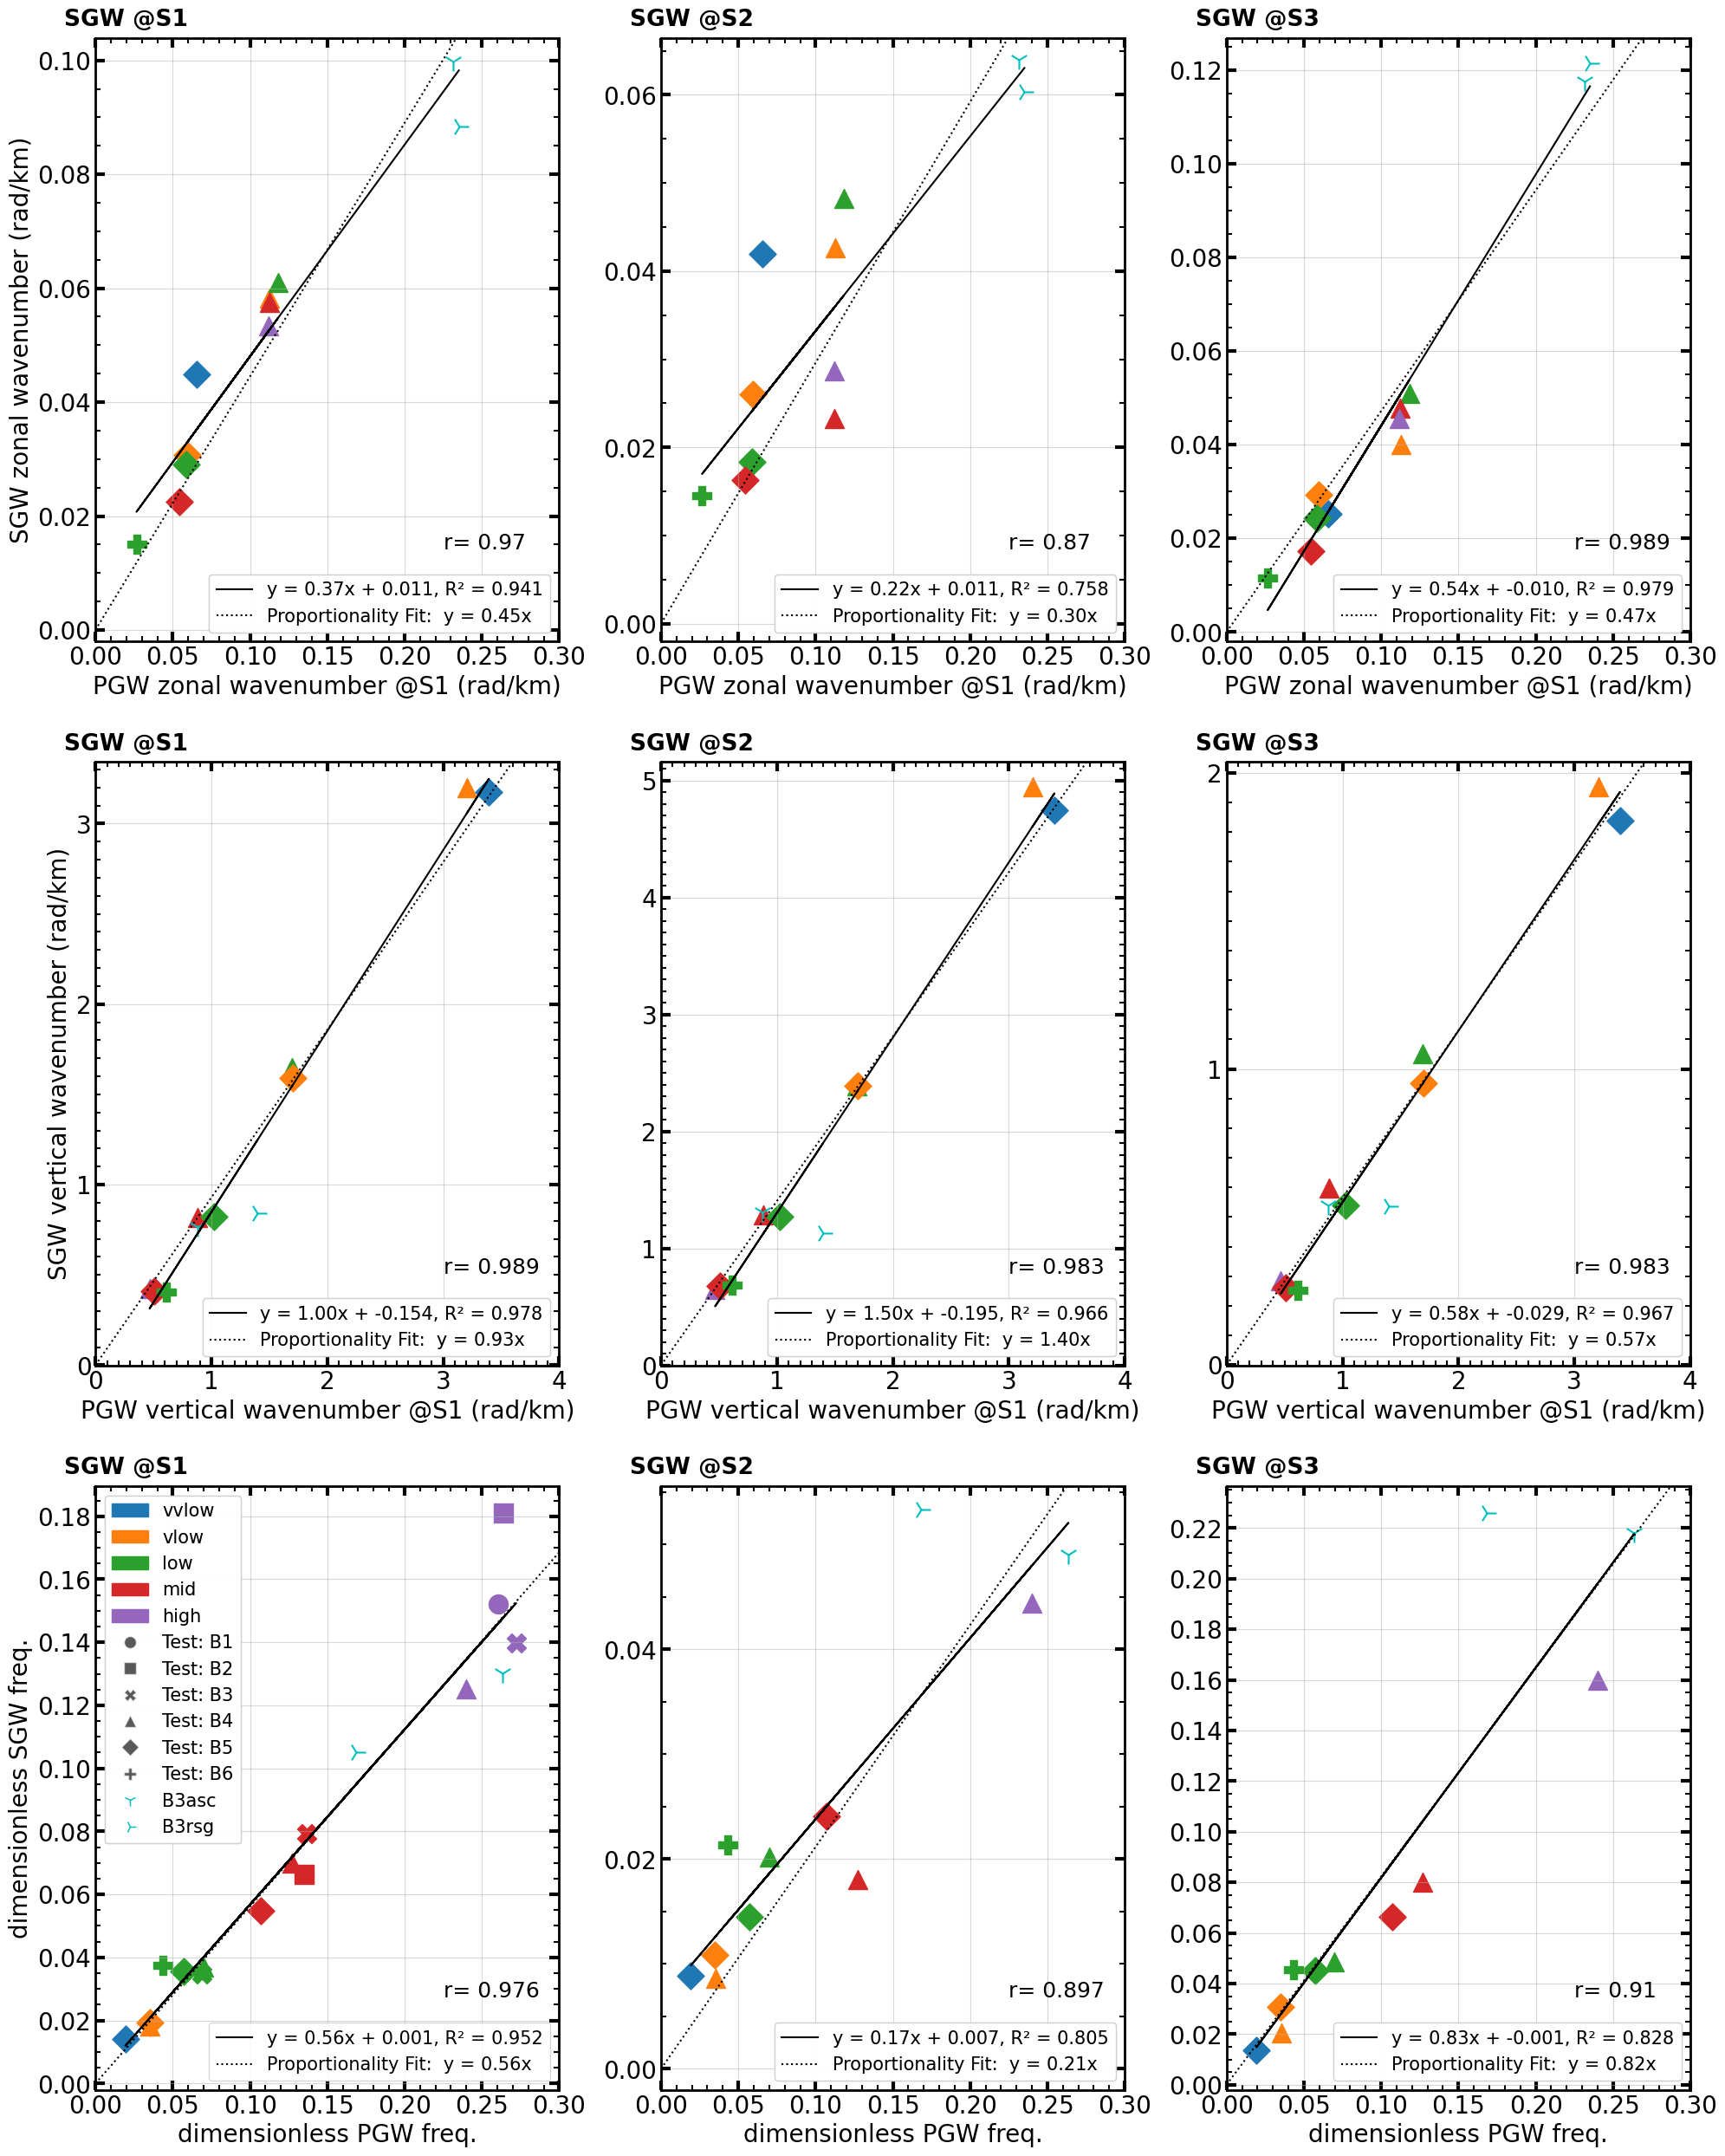

In [11]:
file_list = ['Fig12_k21s-k1s','Fig12_k22s-k1s','Fig12_k23s-k1s','Fig12_m21s-m1s','Fig12_m22s-m1s','Fig12_m23s-m1s','Fig12_o21s-o1s','Fig12_o22s-o1s','Fig12_o23s-o1s',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

l = 0
for i in [0,1,2]:
    if i ==1:
        x=np.arange(0,4.2,0.5); x_major = 1; x_minor = 0.1; y_major = 1; y_minor = 0.1
    else:
        x=np.arange(0,0.33,0.05); x_major = 0.05; x_minor = 0.01; y_major = 0.02; y_minor = 0.005   
        
    for j in [0,1,2]:
        ax = axes[i,j]
        ############# reading data###########################################################################
        data = readsav('../data/'+file_list[l]+'.sav')
        # diagnosed PGW vertical wavenumber with the expected MW vertical wavenumber
        df = pd.DataFrame(data=data['s'],columns = ['Test_name'])
        df ['PGW']= data['x']; df['SGW'] = data['y']; 
        df, tnames, tstrength, legend_elements = marker_color(df)
        ######################################################################################################
        # Scatter plot with colors and markers
        for k in range(len(df)):    
            ax.scatter(df.at[k, 'PGW'], df.at[k, 'SGW'], color=df.at[k, 'color'], s=250, marker=df.at[k, 'marker'])   
        ######################################################################################################
        ax.grid(True, alpha=0.5)
        ax.tick_params(axis='both', which='major',  length=8, width=3,   direction ='in', top=True, right=True)
        ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
        ax.set_xlim([x[0], x[-1]])
        ax.set_ylim([-0.002, None])
        ax.yaxis.set_major_locator(MultipleLocator(y_major))
        ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
        ax.xaxis.set_major_locator(MultipleLocator(x_major))
        ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
        #######################################################################################################
        
        if i ==0:
            ax.set_xlabel("PGW zonal wavenumber @S1 (rad/km)")
            if j==0:
                ax.set_ylabel("SGW zonal wavenumber (rad/km)")   
        if i ==1:
            ax.set_xlabel("PGW vertical wavenumber @S1 (rad/km)")  
            if j==0:
                ax.set_ylabel("SGW vertical wavenumber (rad/km)")
        if i ==2:
            ax.set_xlabel("dimensionless PGW freq.")
            if j==0:
                ax.set_ylabel("dimensionless SGW freq.")
        
        #######################################################################################################
        # Perform Linear Regression (y = mx + c)
        xx = df ['PGW']
        yy = df ['SGW']
        coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
        y_linear = np.polyval(coeffs_linear, xx)
        r2_linear = r2_score(yy, y_linear)
        ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

        # Perform Proportionality Fit (y = mx)
        slope_proportional = np.sum(xx * yy) / np.sum(xx**2)  # Least-squares slope with intercept = 0
        y_proportional = slope_proportional * x
        p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')
        #######################################################################################################
        # Add additional legend for  p2, p3
        additional_legend = ax.legend(handles=[
            plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(*coeffs_linear, r2_linear)),
            plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
        ], loc="lower right", fontsize=15)
        #######################################################################################################
        # Add both legends to the plot
        ax.add_artist(additional_legend)  # Add the line legend manually
        
        ax.text(0.75, 0.18, "r= "+str(np.round(np.corrcoef(xx, yy)[0,1],3))
                , transform=ax.transAxes, fontsize=18,
                verticalalignment='top', horizontalalignment='left')
        #######################################################################################################
        ax.text(
        0.2, 1.03,  # Same position for alignment
        "SGW @S"+str(j+1),
        fontweight='bold', fontsize=19,  # Larger font size for the main title
        ha='right', va='center', transform=ax.transAxes  # Use relative coordinates    
        )
        
        #########################################################################################################
        l +=1
    #####################################################################################################
        # Legend for scatter points
        if j ==0 and i==2:
            scatter_legend = ax.legend(handles=legend_elements, loc="upper left", fontsize=15)
            ax.add_artist(scatter_legend)  # Add the scatter legend manually
    #####################################################################################################

plt.savefig('../article_figs/Fig12.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig12.pdf',bbox_inches='tight')
plt.show()


<br>
<br><span style="font-size:40px;">Figure 13</span> (currently: Fig15)

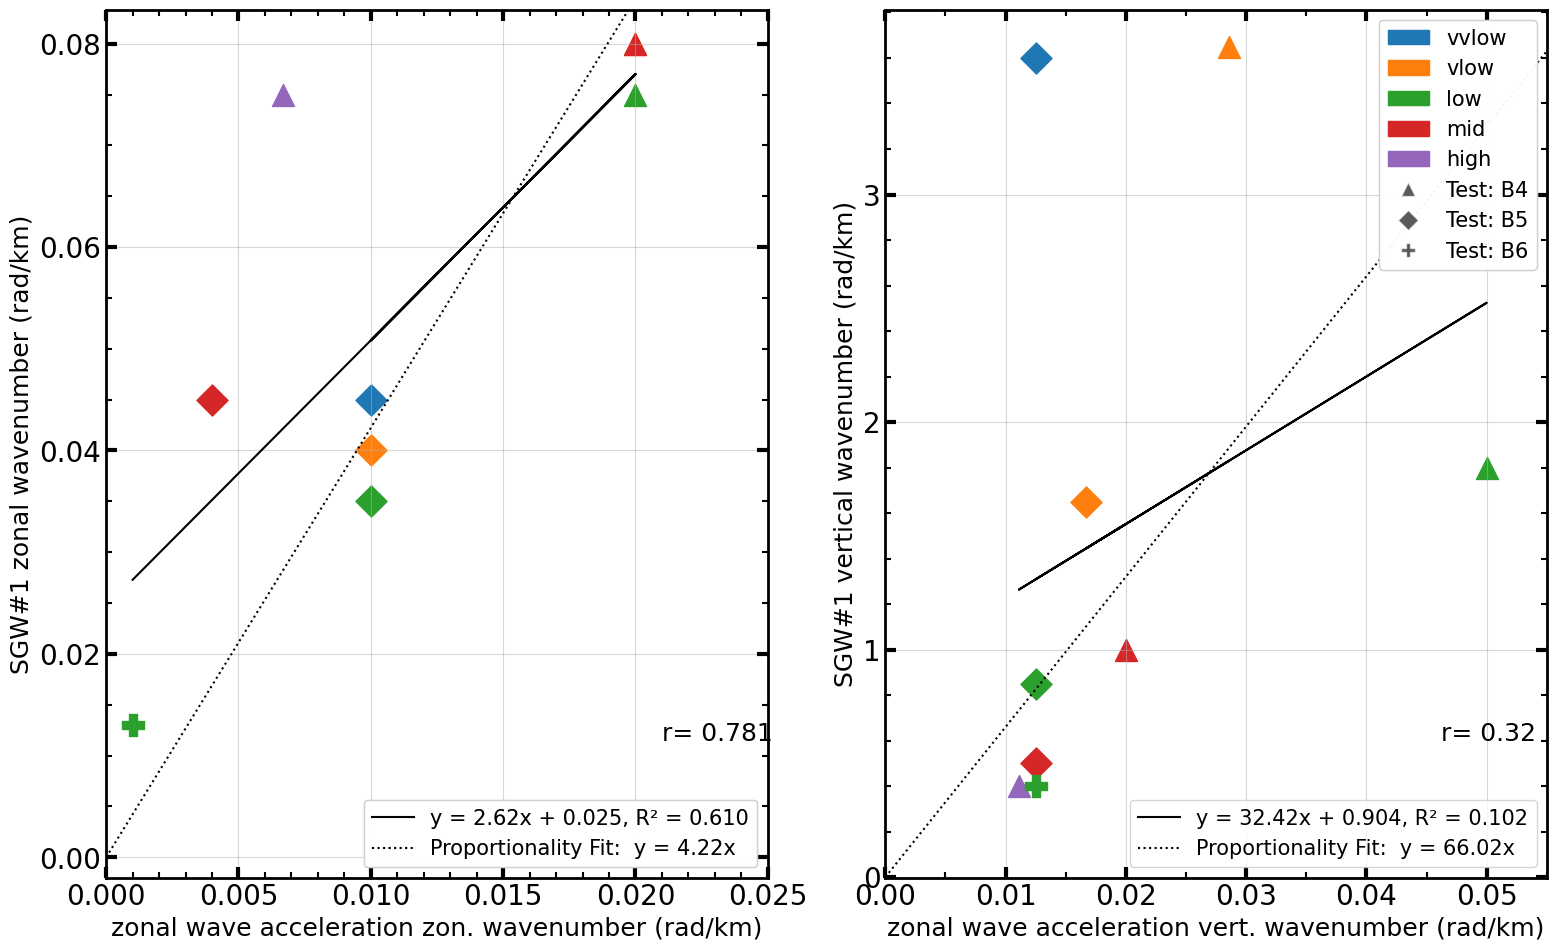

In [13]:
file_list = ['Fig13_k21-ka','Fig13_m21-ma']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

for j in [0,1]:
    ax = axes[j]

    if j ==0:
        x=np.arange(0,0.03,0.005); x_major = 0.005; x_minor = 0.001; y_major = 0.02; y_minor = 0.005
    else:
        x=np.arange(0,0.06,0.005); x_major = 0.01; x_minor = 0.005; y_major = 1; y_minor = 0.2   
    
    ############# reading data###########################################################################
    data = readsav('../data/'+file_list[j]+'.sav')
    
    mask = (data['y'] > -200)

    df = pd.DataFrame(data=data['s'][mask],columns = ['Test_name'])
    df ['PGW']= data['x'][mask]; df['SGW'] = data['y'][mask]; 
    df, tnames, tstrength, legend_elements = marker_color(df)
    ######################################################################################################
    # Scatter plot with colors and markers
    for k in range(len(df)):    
        ax.scatter(df.at[k, 'PGW'], df.at[k, 'SGW'], color=df.at[k, 'color'], s=250, marker=df.at[k, 'marker'])   
    ######################################################################################################
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3,   direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([-0.002, None])
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
    #######################################################################################################
    
    if j==0:
        ax.set_xlabel("zonal wave acceleration zon. wavenumber (rad/km)",fontsize=18)
        ax.set_ylabel("SGW#1 zonal wavenumber (rad/km)",fontsize=18)   
    if j==1:
        ax.set_xlabel("zonal wave acceleration vert. wavenumber (rad/km)",fontsize=18)  
        ax.set_ylabel("SGW#1 vertical wavenumber (rad/km)",fontsize=18)

    
    #######################################################################################################
    # Perform Linear Regression (y = mx + c)
    xx = df ['PGW']
    yy = df ['SGW']
    coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
    y_linear = np.polyval(coeffs_linear, xx)
    r2_linear = r2_score(yy, y_linear)
    ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

    # Perform Proportionality Fit (y = mx)
    slope_proportional = np.sum(xx * yy) / np.sum(xx**2)  # Least-squares slope with intercept = 0
    y_proportional = slope_proportional * x
    p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')
    #######################################################################################################
    # Add additional legend for  p2, p3
    additional_legend = ax.legend(handles=[
        plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(*coeffs_linear, r2_linear)),
        plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
    ], loc="lower right", fontsize=15)
    #######################################################################################################
    # Add both legends to the plot
    ax.add_artist(additional_legend)  # Add the line legend manually
    
    ax.text(0.84, 0.18, "r= "+str(np.round(np.corrcoef(xx, yy)[0,1],3))
            , transform=ax.transAxes, fontsize=18,
            verticalalignment='top', horizontalalignment='left')
    
       
    #####################################################################################################
    if j==1:
        scatter_legend = ax.legend(handles=legend_elements, loc="upper right", fontsize=15)
        ax.add_artist(scatter_legend)  # Add the scatter legend manually
    #####################################################################################################

# plt.savefig('../article_figs/Fig13.png',bbox_inches='tight')
# plt.savefig('../article_figs/Fig13.pdf',bbox_inches='tight')
plt.show()